# CSE-221710309059-v praveenkumar
[DocumentationLink](https://docs.google.com/document/d/1W0phNpXb349SPpgv8QBXRJuvv0xeWVFBJ18ljVuJ5Fo/edit?usp=sharing)

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('diamonds.csv')

In [5]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
#no of rows and columns from the dataset
df.shape[0]

53940

In [9]:
df.shape[1]

10

In [10]:
#Check how many categorical and numerical columns are there
print(len(df.select_dtypes(include=['object']).columns))
print(len(df.select_dtypes(include=['int64','float64']).columns))

3
7


In [11]:
#Descriptive information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
#describe
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
# Get the frequency of the categories in all the columns of the dataset
print(df['cut'].value_counts())
print(df['color'].value_counts())
print(df['clarity'].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [14]:
#Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

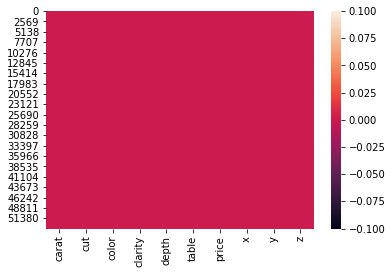

In [17]:
sns.heatmap(df.isna())

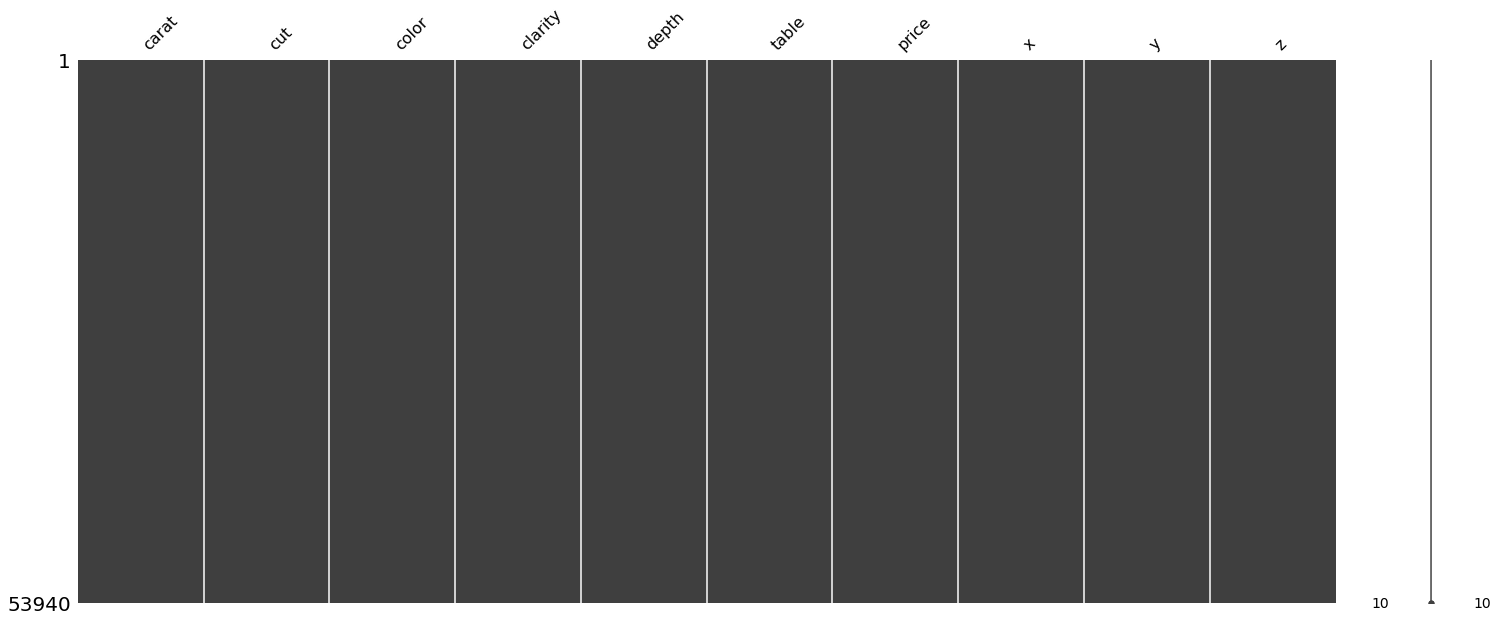

In [18]:
import missingno as msno
msno.matrix(df)

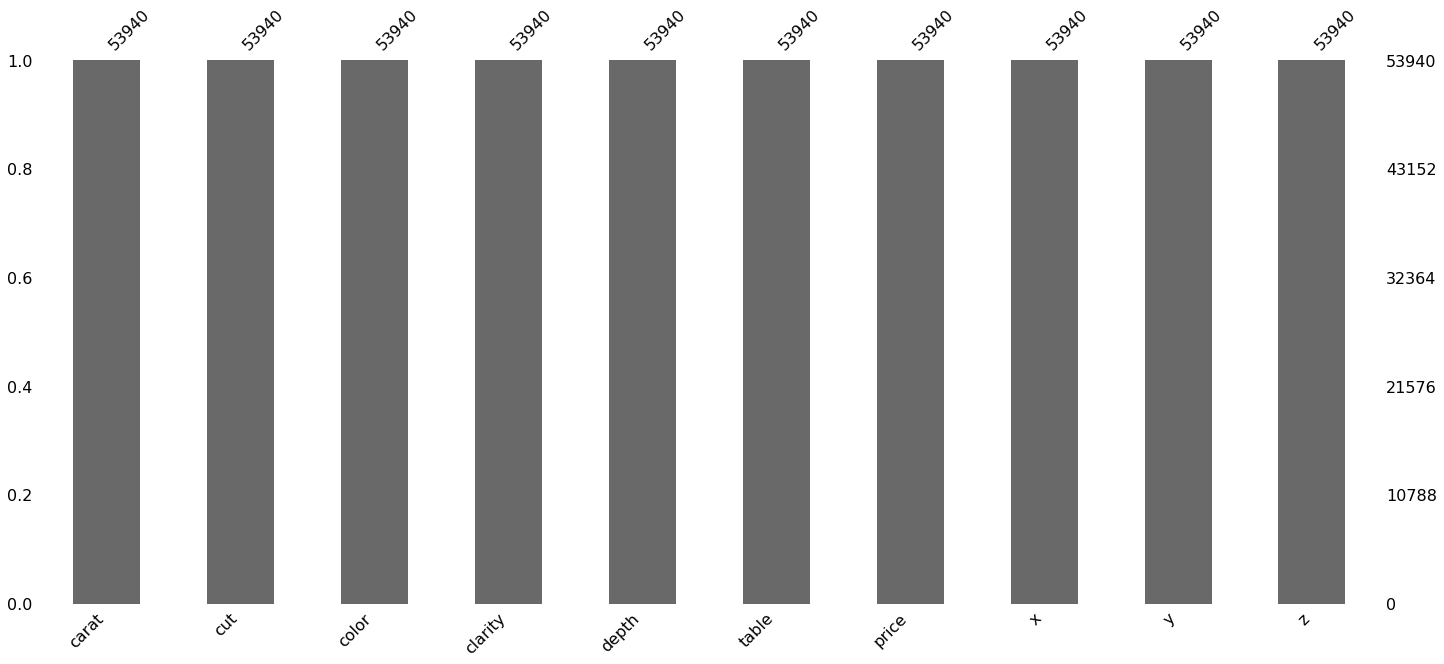

In [19]:
msno.bar(df)

In [20]:
# Impute the missing values based on numerical and categorical
df_mean_imputed = df.fillna(df.mean())
df_mode_imputed = df.fillna(df.mode())
df_Na_imputed = df.fillna('Na')

In [21]:
df_mean_imputed

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
df_mode_imputed

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
df_Na_imputed

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272253C66C8>,
      dtype=object)

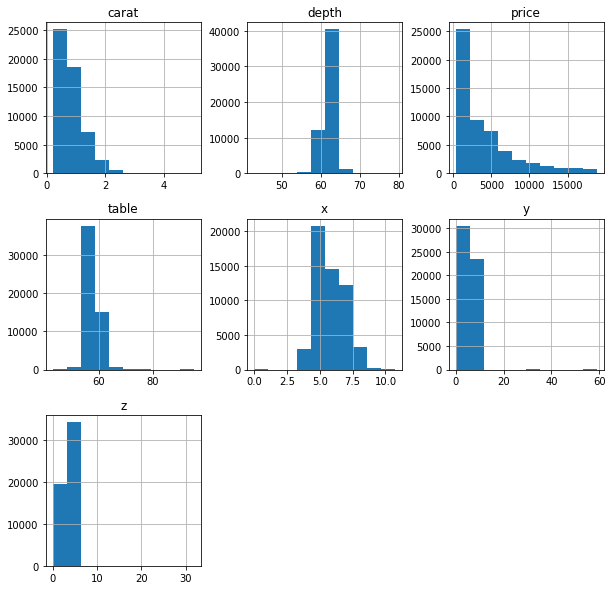

In [24]:
# Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots generated
df.hist(figsize=(10,10))

In [27]:
#Select any column as output  from the dataset and plot the output column with some of the input columns,
#which are suitable from your data columns
df.cut.value_counts(normalize=True)*100

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

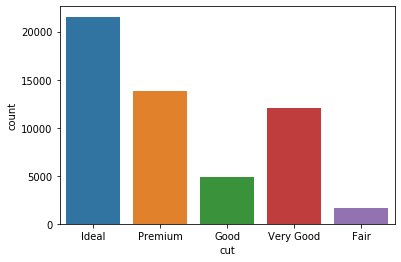

In [28]:
sns.countplot(df['cut'])

Text(0.5, 1.0, 'Categories of Cut')

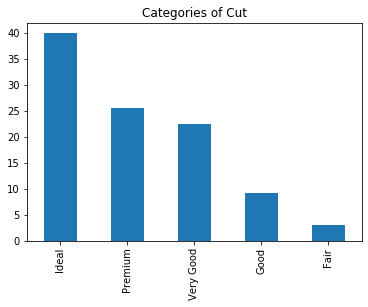

In [30]:
(df.cut.value_counts(normalize=True)*100).plot.bar().set_title("Categories of Cut")

In [31]:
# Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn
merge=pd.get_dummies(df,columns=['cut','color','clarity'])
merge

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
merge=sc.fit_transform(merge)
merge

array([[-1.19816781, -0.17409151, -1.09967199, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-1.24036129, -1.36073849,  1.58552871, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-1.19816781, -3.38501862,  3.37566251, ..., -0.54229492,
        -0.26960284, -0.32195387],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [ 0.13092691, -0.52310533,  0.24292836, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-0.10113725,  0.31452784, -1.09967199, ..., -0.54229492,
        -0.26960284, -0.32195387]])

In [33]:
merge=pd.DataFrame(merge)
merge

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,-0.175403,-0.316312,1.225928,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,-0.175403,-0.316312,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,-0.175403,3.161440,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,-0.175403,-0.316312,-0.815708,...,2.991381,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,-0.175403,3.161440,-0.815708,...,-0.334294,4.267248,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888,-0.175403,-0.316312,1.225928,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988,-0.175403,3.161440,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53937,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135,-0.175403,-0.316312,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53938,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204,-0.175403,-0.316312,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer(transformers=[('Encoder',OneHotEncoder(),['color'])],remainder="passthrough")

df1=ct.fit_transform(df)
df1=pd.DataFrame(df1)
df1=df1.iloc[:,0:2]
df1.columns=['color','clarity']
df1=pd.concat([df,df1],axis=1)
df1=df1.drop('color',axis=1)
df1

,carat,cut,clarity,depth,table,price,x,y,z,clarity
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,SI1,60.8,57.0,2757,5.75,5.76,3.50,0
53936,0.72,Good,SI1,63.1,55.0,2757,5.69,5.75,3.61,0
53937,0.70,Very Good,SI1,62.8,60.0,2757,5.66,5.68,3.56,0
53938,0.86,Premium,SI2,61.0,58.0,2757,6.15,6.12,3.74,0


In [ ]:
# cannot use label encoder for this csv file.